# Iris Flower Classification Project by Rahul Bansal

### Importing Modules

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

### Importing data into a data frame

In [99]:
df_iris = pd.read_csv(r'C:\Users\Rahul Bansal\Desktop\Iris Flowers\iris_flowers.csv')

df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,iris_setosa
1,4.9,3.0,1.4,0.2,iris_setosa
2,4.7,3.2,1.3,0.2,iris_setosa
3,4.6,3.1,1.5,0.2,iris_setosa
4,5.0,3.6,1.4,0.2,iris_setosa


In [100]:
#shape of the data
print(df_iris.shape)

#describing the data
print(df_iris.describe())

(150, 5)
       sepal_length  sepal_width  petal_length   petal_width
count    150.000000   150.000000    150.000000    150.000000
mean       5.843333     3.054000      3.758667      1.198667
std        0.828066     0.433594      1.764420      0.763161
min        4.300000     2.000000      1.000000      0.100000
25%        5.100000     2.800000      1.600000      0.300000
50%        5.800000     3.000000      4.350000      1.300000
75%        6.400000     3.300000      5.100000      1.800000
max        7.900000     4.400000      6.900000      2.500000


In [101]:
#renaming column name
df_iris.rename(columns = {' petal_width' : 'petal_width'},inplace = True)

In [102]:
df_iris1 = df_iris.groupby('class').mean()
df_iris1

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
iris_setosa,5.006,3.418,1.464,0.244
iris_versicolor,5.936,2.770,4.260,1.326
iris_virginica,6.588,2.974,5.552,2.026


class         iris_setosa  iris_versicolor  iris_virginica
sepal_length        5.006            5.936           6.588
sepal_width         3.418            2.770           2.974
petal_length        1.464            4.260           5.552
petal_width         0.244            1.326           2.026


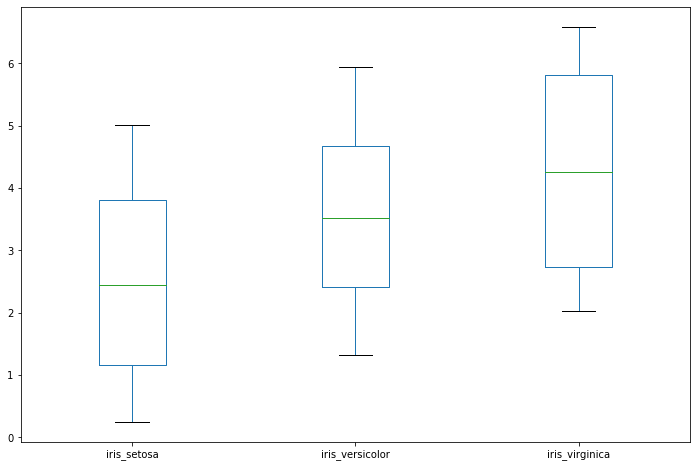

In [103]:
#Box plot
df_iris1 = df_iris1.transpose()
print(df_iris1)
df_iris1.plot(kind = 'box',figsize = (12,8))

plt.show()

### Feature Selection

In [104]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
x= df_iris[features]
y = df_iris['class']

print(x[:5])
print(y[:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    iris_setosa
1    iris_setosa
2    iris_setosa
3    iris_setosa
4    iris_setosa
Name: class, dtype: object


### Normalizing Data

In [105]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit(x).transform(x)
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

### Splitting data

In [106]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)
print("trainig data:",x_train.shape,y_train.shape)
print("testing data:",x_test.shape,y_test.shape)

trainig data: (120, 4) (120,)
testing data: (30, 4) (30,)


### Applying Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#trainig model and predicting on test values
lr = LogisticRegression(C = 0.01, solver = 'liblinear')
lr.fit(x_train,y_train)
yhat_train = lr.predict(x_train)
yhat_train_prob = lr.predict_proba(x_train)
yhat_test = lr.predict(x_test)
yhat_prob = lr.predict_proba(x_test)

### Accuracy

In [108]:
from sklearn.metrics import log_loss,f1_score,confusion_matrix, jaccard_similarity_score


print("logistic Regression accuracy: ",accuracy_score(y_test,yhat_test),"\n\n\n")
print("Jaccard similarity score",jaccard_similarity_score(y_test,yhat_test))
print("\nconfussion matrix\n",confusion_matrix(y_test,yhat_test))
print("\nLog loss: ",log_loss(y_test,yhat_prob))


print("\nJaccard similarity score training",jaccard_similarity_score(y_train,yhat_train))
print("\nconfussion matrix training\n",confusion_matrix(y_train,yhat_train))
print("\nLog loss: ",log_loss(y_train,yhat_train_prob))

logistic Regression accuracy:  0.5666666666666667 



Jaccard similarity score 0.5666666666666667

confussion matrix
 [[11  0  0]
 [ 0  0 13]
 [ 0  0  6]]

Log loss:  0.8513505802565011

Jaccard similarity score training 0.6916666666666667

confussion matrix training
 [[39  0  0]
 [ 0  0 37]
 [ 0  0 44]]

Log loss:  0.8015438578968147


C:\Users\Rahul Bansal\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\Rahul Bansal\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### K-Nearest Neighbour (KNN)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#finding best k
ks = 11
mean_acc = np.zeros(ks-1)
std = np.zeros(ks-1)

for i in range(1,ks):
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = knn.predict(x_test)
    
    mean_acc[i-1] = accuracy_score(y_test,yhat)
    std[i-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

print(mean_acc,'\n\n',std)


[1.         1.         1.         1.         1.         1.
 0.96666667 1.         0.96666667 0.96666667] 

 [0.         0.         0.         0.         0.         0.
 0.03277307 0.         0.03277307 0.03277307]


It seems that the value 3 for K is best. let's build are model again using k equal 4.

In [110]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
y_hat_knn = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test,y_hat_knn)
print("K Neighbor Model Accuracy: ",knn_accuracy)

K Neighbor Model Accuracy:  1.0


### SVM Model

In [111]:
from sklearn import svm

Svm = svm.SVC(kernel='rbf')
Svm.fit(x_train,y_train)

y_hat_svm = Svm.predict(x_test)
svm_accuracy = accuracy_score(y_test,y_hat_svm)
print("SVM Model accuracy: ",svm_accuracy)

SVM Model accuracy:  0.9666666666666667


### Random Forest Model

In [112]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 5)
rfc.fit(x_train,y_train)
y_hat_rfc = rfc.predict(x_test)
rfc_accuracy = accuracy_score(y_test,y_hat_rfc)

print("Random Forest Model accuracy: ",rfc_accuracy)

Random Forest Model accuracy:  0.9666666666666667


## Decision Tree Model

In [113]:
from sklearn.tree import DecisionTreeClassifier

